[김태영-케라스-학습과정 표시하기](https://tykimos.github.io/2017/07/09/Training_Monitoring/)<br>
아래 내용은 상기 링크를 정리한것.

# Training Monitoring

케라스로 딥러닝 모델을 개발할때,<br> 
가장많이 보게 되는것 fit함수가 화면에 찍어주는 로그이다.<br>
이 로그에 포함된 수치들은 학습이 제대로 되고 있는 지,<br> 
학습을 그만할지 등을 판단하는 중요한 척도가 된다.<br>
수치 자체도 큰 의미가 있지만 수치들이 epochs마다 바뀌는 변화 추이를 보는 것이 중요하기 때문에,<br>
그래프로 표시하여 보는 것이 더 직관적이다.<br>
본 절에서는 케라스에서 제공하는 기능을 이용하는 방법,<br>
텐서보드와 연동하여 보는 방법,<br>
콜백함수를 직접 만들어서 사용하는 방법에 대해서 알아본다.<br>
* 히스토리 기능 사용하기
* 텐서보드와 연동하기
* 직접 콜백함수 만들어보기

## 히스토리 기능 사용하기
케라스에서 학습시킬 때 fit 함수를 사용한다.<br>
이 함수의 반환 값으로 히스토리 객체를 얻을 수 있는데,<br>
이 객체는 다음의 정보를 담고 있다.<br>
* 매 epochs 마다의 훈련 손실값(loss)
* 매 epochs 마다의 훈련 정확도(acc)
* 매 epochs 마다의 검증 손실값(val_loss)
* 매 epochs 마다의 검증 정확도(val_acc)
<br>

<br>
히스토리 기능은 케라스의 모든 모델에 탑제되어 있으므로 다른 설정없이 fit 함수의 반환으로 쉽게 확인가능.<br>
사용법은 다음과 같다

In [ ]:
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val_, Y_val))

print(hist.history['lose'])
print(hist.history['acc'])
print(hist.history['val_loss'])
print(hist.history['val_acc'])

수치들은 각 epochs마다 해당 값이 추가되므로 배열 형태로 저장 되어 있음.<br>
이러한 수치들은 매 epochs마다 변화되는 추이를 그래프로 표시하여 비교하면서 보면 학습 상태를 직관적으로 관찰할 수 있다.<br>
아래 코드와 같이 matplotlib패키지를 이용하면 하나의 그래프로 쉽게 표시가 가능<br>
* train_loss(노란색): 훈련손실 값이며, x축은 epochs 수, 좌측 y축은 손실값을 나타낸다.
* val_loss(빨간색): 검증 손실값이며, x축은 epochs 수, 좌측 y축은 손실값을 나타낸다. 
* tarin_acc(파란색): 훈련 정화도이며, x축은 epochs 수, 우측 y축은 정확도를 나타낸다.
* val_acc(녹색): 검증 정확도이며, x축은 epochs 수, 우축 y축은 정확도를 나타낸다.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx() #??

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', lable='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
loss_ax.legend(loc='lower left')

plt.show()

손글씨 data set인 MNIST를 다층 퍼셉트론 모델로 학습시키는 간단한 예제로 테스트를 진행.

In [10]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

In [15]:
np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험 셋로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [16]:
# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
X_train = X_train[:50000]

Y_val = Y_train[50000:]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

In [17]:
# 훈련셋, 금증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]

X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

In [18]:
# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

In [19]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units = 2, input_dim = 28*28, activation = 'relu'))
model.add(Dense(units = 10, activation='softmax'))

In [20]:
# 3. 모델 엮기 # optimizer: Neural Network를 구성하는 알고리즘을 최적화 시켜주는 도구
model.compile(loss = 'categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [21]:
# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs = 1000, batch_size=10, validation_data=(X_val, Y_val))

Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 8s 12ms/step - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
Epoch 2/1000
700/700 [==============================] - 0s 460us/step - loss: 2.2072 - acc: 0.1657 - val_loss: 2.1908 - val_acc: 0.1800
Epoch 3/1000
700/700 [==============================] - 0s 455us/step - loss: 2.1729 - acc: 0.1729 - val_loss: 2.1630 - val_acc: 0.1867
Epoch 4/1000
700/700 [==============================] - 0s 459us/step - loss: 2.1441 - acc: 0.1786 - val_loss: 2.1371 - val_acc: 0.1867
Epoch 5/1000
700/700 [==============================] - 0s 460us/step - loss: 2.1176 - acc: 0.1900 - val_loss: 2.1140 - val_acc: 0.1867
Epoch 6/1000
700/700 [==============================] - 0s 431us/step - loss: 2.0939 - acc: 0.2029 - val_loss: 2.0931 - val_acc: 0.2033
Epoch 7/1000
700/700 [==============================] - 0s 430us/step - loss: 2.0719 - acc: 0.2086 - val_loss: 2.0726 - val_acc: 0.2067
Epo

Epoch 120/1000
700/700 [==============================] - 0s 429us/step - loss: 1.6646 - acc: 0.3229 - val_loss: 1.8256 - val_acc: 0.2133
Epoch 121/1000
700/700 [==============================] - 0s 415us/step - loss: 1.6632 - acc: 0.3157 - val_loss: 1.8162 - val_acc: 0.2233
Epoch 122/1000
700/700 [==============================] - 0s 404us/step - loss: 1.6621 - acc: 0.3214 - val_loss: 1.8209 - val_acc: 0.2233
Epoch 123/1000
700/700 [==============================] - 0s 444us/step - loss: 1.6613 - acc: 0.3186 - val_loss: 1.8172 - val_acc: 0.2233
Epoch 124/1000
700/700 [==============================] - 0s 438us/step - loss: 1.6600 - acc: 0.3157 - val_loss: 1.8252 - val_acc: 0.2367
Epoch 125/1000
700/700 [==============================] - 0s 447us/step - loss: 1.6589 - acc: 0.3186 - val_loss: 1.8298 - val_acc: 0.2367
Epoch 126/1000
700/700 [==============================] - 0s 421us/step - loss: 1.6571 - acc: 0.3186 - val_loss: 1.8256 - val_acc: 0.2267
Epoch 127/1000
700/700 [==========

700/700 [==============================] - 0s 448us/step - loss: 1.5771 - acc: 0.3443 - val_loss: 1.8683 - val_acc: 0.2133
Epoch 239/1000
700/700 [==============================] - 0s 395us/step - loss: 1.5767 - acc: 0.3529 - val_loss: 1.8750 - val_acc: 0.2300
Epoch 240/1000
700/700 [==============================] - 0s 426us/step - loss: 1.5747 - acc: 0.3543 - val_loss: 1.8793 - val_acc: 0.2467
Epoch 241/1000
700/700 [==============================] - 0s 437us/step - loss: 1.5744 - acc: 0.3571 - val_loss: 1.8771 - val_acc: 0.2433
Epoch 242/1000
700/700 [==============================] - 0s 433us/step - loss: 1.5740 - acc: 0.3571 - val_loss: 1.8788 - val_acc: 0.2133
Epoch 243/1000
700/700 [==============================] - 0s 437us/step - loss: 1.5739 - acc: 0.3600 - val_loss: 1.8853 - val_acc: 0.2167
Epoch 244/1000
700/700 [==============================] - 0s 454us/step - loss: 1.5708 - acc: 0.3571 - val_loss: 1.8767 - val_acc: 0.2200
Epoch 245/1000
700/700 [=========================

700/700 [==============================] - 0s 421us/step - loss: 1.5258 - acc: 0.3700 - val_loss: 1.9544 - val_acc: 0.2433
Epoch 357/1000
700/700 [==============================] - 0s 422us/step - loss: 1.5257 - acc: 0.3729 - val_loss: 1.9475 - val_acc: 0.2267
Epoch 358/1000
700/700 [==============================] - 0s 425us/step - loss: 1.5250 - acc: 0.3700 - val_loss: 1.9614 - val_acc: 0.2233
Epoch 359/1000
700/700 [==============================] - 0s 431us/step - loss: 1.5251 - acc: 0.3757 - val_loss: 1.9557 - val_acc: 0.2200
Epoch 360/1000
700/700 [==============================] - 0s 418us/step - loss: 1.5231 - acc: 0.3729 - val_loss: 1.9573 - val_acc: 0.2267
Epoch 361/1000
700/700 [==============================] - 0s 422us/step - loss: 1.5230 - acc: 0.3729 - val_loss: 1.9567 - val_acc: 0.2300
Epoch 362/1000
700/700 [==============================] - 0s 449us/step - loss: 1.5240 - acc: 0.3671 - val_loss: 1.9587 - val_acc: 0.2233
Epoch 363/1000
700/700 [=========================

700/700 [==============================] - 0s 433us/step - loss: 1.4860 - acc: 0.3871 - val_loss: 1.9997 - val_acc: 0.2300
Epoch 475/1000
700/700 [==============================] - 0s 425us/step - loss: 1.4865 - acc: 0.3900 - val_loss: 2.0056 - val_acc: 0.2200
Epoch 476/1000
700/700 [==============================] - 0s 437us/step - loss: 1.4855 - acc: 0.3871 - val_loss: 2.0063 - val_acc: 0.2267
Epoch 477/1000
700/700 [==============================] - 0s 419us/step - loss: 1.4863 - acc: 0.3900 - val_loss: 2.0087 - val_acc: 0.2200
Epoch 478/1000
700/700 [==============================] - 0s 433us/step - loss: 1.4859 - acc: 0.3929 - val_loss: 2.0079 - val_acc: 0.2300
Epoch 479/1000
700/700 [==============================] - 0s 449us/step - loss: 1.4856 - acc: 0.3871 - val_loss: 2.0000 - val_acc: 0.2267
Epoch 480/1000
700/700 [==============================] - 0s 398us/step - loss: 1.4849 - acc: 0.3929 - val_loss: 2.0110 - val_acc: 0.2400
Epoch 481/1000
700/700 [=========================

700/700 [==============================] - 0s 463us/step - loss: 1.4587 - acc: 0.4014 - val_loss: 2.0542 - val_acc: 0.2333
Epoch 593/1000
700/700 [==============================] - 0s 429us/step - loss: 1.4588 - acc: 0.3971 - val_loss: 2.0458 - val_acc: 0.2267
Epoch 594/1000
700/700 [==============================] - 0s 422us/step - loss: 1.4583 - acc: 0.4129 - val_loss: 2.0465 - val_acc: 0.2333
Epoch 595/1000
700/700 [==============================] - 0s 446us/step - loss: 1.4582 - acc: 0.4000 - val_loss: 2.0511 - val_acc: 0.2367
Epoch 596/1000
700/700 [==============================] - 0s 403us/step - loss: 1.4580 - acc: 0.3986 - val_loss: 2.0422 - val_acc: 0.2300
Epoch 597/1000
700/700 [==============================] - 0s 454us/step - loss: 1.4569 - acc: 0.4043 - val_loss: 2.0460 - val_acc: 0.2500
Epoch 598/1000
700/700 [==============================] - 0s 440us/step - loss: 1.4579 - acc: 0.4000 - val_loss: 2.0490 - val_acc: 0.2267
Epoch 599/1000
700/700 [=========================

700/700 [==============================] - 0s 454us/step - loss: 1.4366 - acc: 0.4157 - val_loss: 2.0874 - val_acc: 0.2433
Epoch 711/1000
700/700 [==============================] - 0s 455us/step - loss: 1.4353 - acc: 0.4129 - val_loss: 2.0898 - val_acc: 0.2367
Epoch 712/1000
700/700 [==============================] - 0s 436us/step - loss: 1.4351 - acc: 0.4129 - val_loss: 2.0949 - val_acc: 0.2567
Epoch 713/1000
700/700 [==============================] - 0s 417us/step - loss: 1.4361 - acc: 0.4129 - val_loss: 2.0799 - val_acc: 0.2367
Epoch 714/1000
700/700 [==============================] - 0s 434us/step - loss: 1.4355 - acc: 0.4157 - val_loss: 2.0892 - val_acc: 0.2367
Epoch 715/1000
700/700 [==============================] - 0s 444us/step - loss: 1.4332 - acc: 0.4171 - val_loss: 2.0875 - val_acc: 0.2567
Epoch 716/1000
700/700 [==============================] - 0s 424us/step - loss: 1.4359 - acc: 0.4100 - val_loss: 2.0963 - val_acc: 0.2433
Epoch 717/1000
700/700 [=========================

700/700 [==============================] - 0s 447us/step - loss: 1.4164 - acc: 0.4343 - val_loss: 2.1295 - val_acc: 0.2400
Epoch 829/1000
700/700 [==============================] - 0s 435us/step - loss: 1.4155 - acc: 0.4271 - val_loss: 2.1361 - val_acc: 0.2433
Epoch 830/1000
700/700 [==============================] - 0s 441us/step - loss: 1.4151 - acc: 0.4300 - val_loss: 2.1388 - val_acc: 0.2433
Epoch 831/1000
700/700 [==============================] - 0s 449us/step - loss: 1.4150 - acc: 0.4371 - val_loss: 2.1495 - val_acc: 0.2433
Epoch 832/1000
700/700 [==============================] - 0s 426us/step - loss: 1.4158 - acc: 0.4314 - val_loss: 2.1531 - val_acc: 0.2400
Epoch 833/1000
700/700 [==============================] - 0s 450us/step - loss: 1.4155 - acc: 0.4271 - val_loss: 2.1584 - val_acc: 0.2367
Epoch 834/1000
700/700 [==============================] - 0s 394us/step - loss: 1.4155 - acc: 0.4257 - val_loss: 2.1656 - val_acc: 0.2467
Epoch 835/1000
700/700 [=========================

700/700 [==============================] - 0s 433us/step - loss: 1.3993 - acc: 0.4329 - val_loss: 2.1757 - val_acc: 0.2533
Epoch 947/1000
700/700 [==============================] - 0s 446us/step - loss: 1.3985 - acc: 0.4329 - val_loss: 2.1978 - val_acc: 0.2600
Epoch 948/1000
700/700 [==============================] - 0s 422us/step - loss: 1.3987 - acc: 0.4243 - val_loss: 2.1670 - val_acc: 0.2400
Epoch 949/1000
700/700 [==============================] - 0s 443us/step - loss: 1.3987 - acc: 0.4414 - val_loss: 2.1689 - val_acc: 0.2433
Epoch 950/1000
700/700 [==============================] - 0s 416us/step - loss: 1.3974 - acc: 0.4386 - val_loss: 2.1744 - val_acc: 0.2433
Epoch 951/1000
700/700 [==============================] - 0s 430us/step - loss: 1.3985 - acc: 0.4343 - val_loss: 2.1860 - val_acc: 0.2533
Epoch 952/1000
700/700 [==============================] - 0s 421us/step - loss: 1.3984 - acc: 0.4371 - val_loss: 2.1846 - val_acc: 0.2467
Epoch 953/1000
700/700 [=========================

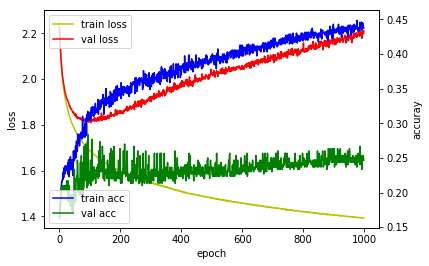

In [27]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

각 epoch에 대한 손실값, 정확도 추이를 볼 수 있다.<br>
검증셋의 손실값이 감소하다가 100 번째 epoch에서 다시 증가 되는 양상을 보인다.<br>
Overfitting(과적합)이 발생했다고 볼 수 있다.<br>
이 경우 100번재 epoch만 학습시킨 모델이 1000번째 epoch까지 학습한 모델보다 실데 테스트에서 더 좋은 결과가 나올 수 있다.<br>

## 텐서보드와 연동하기

텐서플로우에서는 텐서보드라는 훌륭한 학습과정 모니터링 툴을 제공하고 있다.<br>
텐서플로우 기반으로 케라스를 구동하는 경우 이 텐서보드를 사용할 수 있다.<br>
따라서 텐서보드를 이용하기 위해서는 먼저 백엔드를 케라스 설정 파일(keras.json)에서 텐서플로우로 지정해야 한다. 단 경로는 설치 환경에 따라 차이가 날 수 있다.<br>